In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

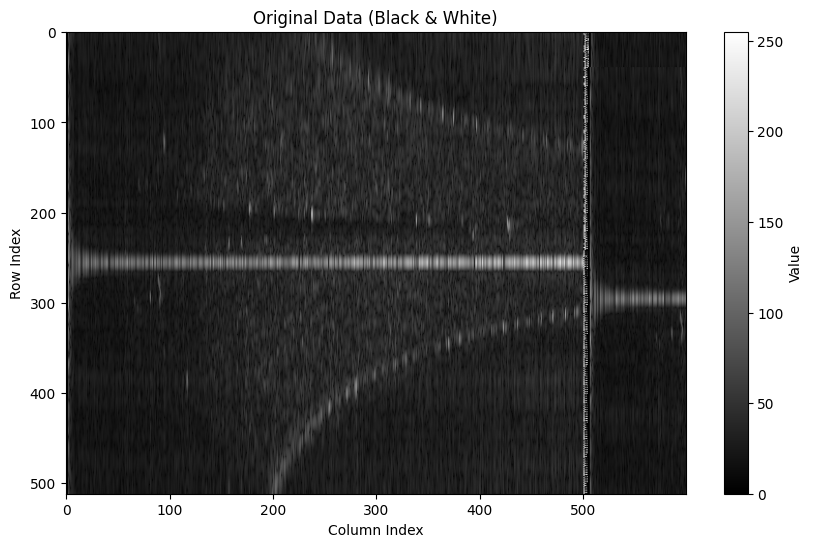

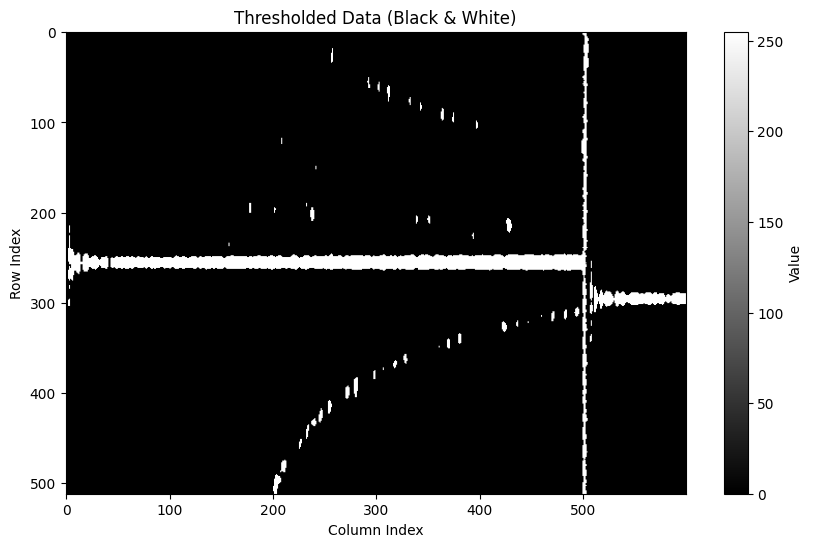

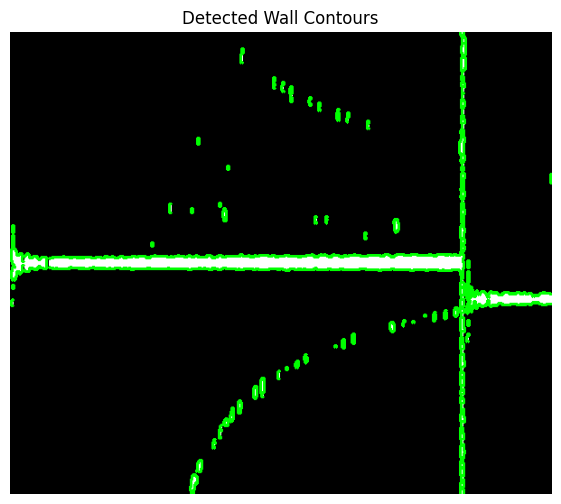

In [2]:
# 读取数据
def read_data(file_name):
    data = []
    with open(file_name, 'r') as file:
        for line in file:
            row = list(map(float, line.split()))
            data.append(row)
    return np.array(data, dtype=np.float32)

# 应用 OpenCV 降噪处理
def denoise_data(data):
    return cv2.GaussianBlur(data, (5, 5), 0)

# 应用阈值处理
def apply_threshold(data, threshold):
    return (data > threshold).astype(np.uint8) * 255

# 查找墙体轮廓
def find_wall_contours(data):
    edges = cv2.Canny(data, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# 绘制轮廓
def draw_contours(data, contours):
    contour_image = cv2.cvtColor(data, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
    return contour_image

# 绘制黑白热图
def plot_blackwhite_heatmap(data, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(data, cmap='gray', aspect='auto')  # 使用灰度色图
    plt.colorbar(label='Value')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.title(title)
    plt.show()

if __name__ == "__main__":
    file_name = 'data.txt'
    data = read_data(file_name)
    denoised_data = denoise_data(data)
    plot_blackwhite_heatmap(data, 'Original Data (Black & White)')
    threshold_value = 70
    thresholded_data = apply_threshold(denoised_data, threshold_value)
    plot_blackwhite_heatmap(thresholded_data, 'Thresholded Data (Black & White)')
    contours = find_wall_contours(thresholded_data)
    contour_image = draw_contours(thresholded_data, contours)
    plt.figure(figsize=(10, 6))
    plt.imshow(contour_image)
    plt.title('Detected Wall Contours')
    plt.axis('off')
    plt.show()


In [3]:
data.shape

(512, 600)